# Visualizing Chipotle's Data

### Step 1: Import the necessary libraries

In [1]:
%pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Step 2: Import the dataset from the given address

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

### Step 3: Assign it to a variable called `chipo`

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 4: See the first 10 entries

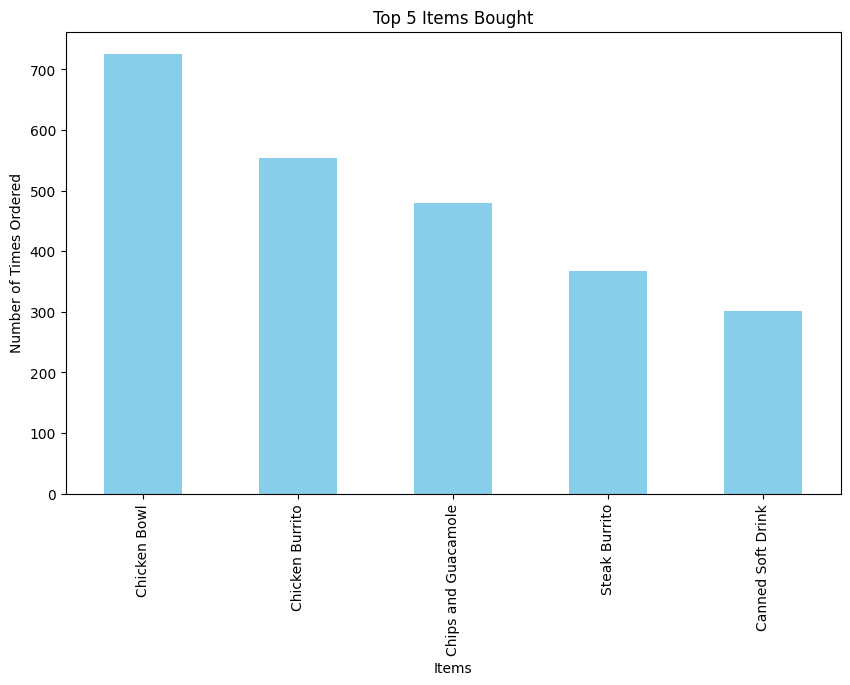

In [4]:
# Count the top 5 items
item_counts = chipo['item_name'].value_counts().head(5)

# Plot the histogram
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Items Bought')
plt.ylabel('Number of Times Ordered')
plt.xlabel('Items')
plt.show()

### Step 5: Create a histogram of the top 5 items bought

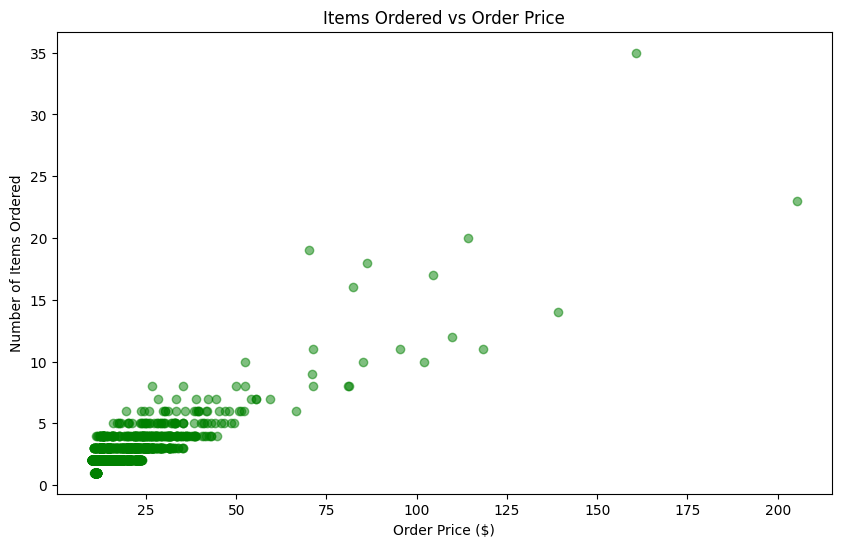

In [5]:
# Clean the item_price column and convert to float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Group by order_id and sum the price and quantity
order_totals = chipo.groupby('order_id').agg({'quantity': 'sum', 'item_price': 'sum'})

# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(order_totals['item_price'], order_totals['quantity'], alpha=0.5, color='green')
plt.title('Items Ordered vs Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.show()

### Step 6: Create a scatterplot with the number of items ordered per order price

### Step 7: BONUS: Create a question and a graph to answer your own question

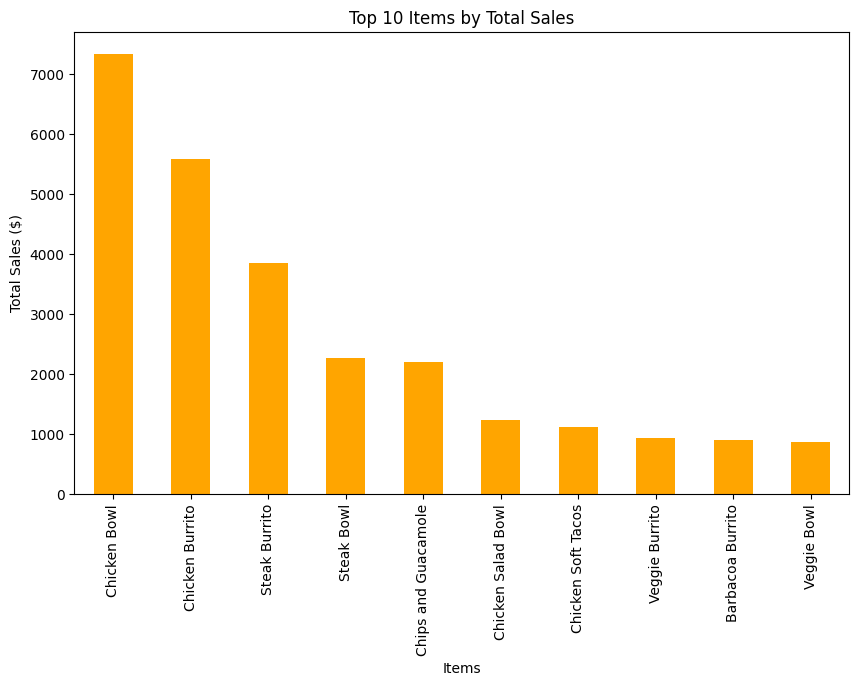

In [6]:
# BONUS: What are the total sales by item type?
item_sales = chipo.groupby('item_name')['item_price'].sum().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
item_sales.plot(kind='bar', color='orange')
plt.title('Top 10 Items by Total Sales')
plt.ylabel('Total Sales ($)')
plt.xlabel('Items')
plt.show()